In [17]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd  # Data processing and manipulation 
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Statistical data visualization
import numpy as np  # Numerical operations and linear algebra 

# Libraries for data preparation and model building
from scipy.stats import norm  # Statistical functions
from sklearn.preprocessing import StandardScaler  # Data preprocessing
import warnings  # Warning handling
warnings.filterwarnings('ignore')  # Ignore warnings

### Loading Turbomedics Dataset

In [18]:
# load the data, used the pandas read_csv() to import our dataset 
data = pd.read_excel('DiabetesDB.xlsx', sheet_name=None)
#df.head() #Preview the dataset

In [19]:
# Cocantenation
df_Original = pd.concat(data.values(), ignore_index=True)

### Loading Additional Dataset From Open Source

In [20]:
# load the data, used the pandas read_csv() to import our dataset 
df_Extra = pd.read_csv('DiabetesDB_Extra.csv')
#df.head() #Preview the dataset

In [21]:
df_Extra.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [22]:
# Step 1: Create 'Full_Name' column
df_Original['FULL_NAME'] = df_Original['NAME '].fillna('') + ' ' + df_Original['SURNAME'].fillna('')

# Step 2: Reorder columns to place 'Full_Name' first
columns = ['FULL_NAME'] + [col for col in df_Original.columns if col not in ['FULL_NAME']]
df_Original = df_Original[columns]


In [23]:
df_Original = df_Original.drop(['FULL_NAME', 'NAME ', 'SURNAME', 'PHONE ', 'EMAIL','STATE OF ORIGIN', 'NAME', 'PHONE CALL ', 'CONTACT', 'RELATIONSHIP', 'FILE  LINK'], axis=1)

#### COde for BMI

In [24]:
import re

def clean_and_convert_to_meters(value):
    # Remove non-numeric characters and decimal points
    cleaned_value = re.sub(r'\D', '', str(value))
    
    if cleaned_value:
        # Convert to float and treat it as centimeters
        height_in_cm = float(cleaned_value)
        # Convert cm to meters
        return height_in_cm / 100
    else:
        return None  # Return None if value is empty or non-numeric

# Apply the function to the 'height' column
df_Original['HEIGHT'] = df_Original['HEIGHT'].apply(clean_and_convert_to_meters)


# Apply the function to the 'height(cm)' column
#df_Original['HEIGHT (cm)'] = df_Original['HEIGHT (cm)'].apply(clean_and_convert_to_meters)



In [25]:
# Create a new 'height' column
#df_Original['HEIGHT'] = df_Original['HEIGHT'].fillna(df_Original['HEIGHT (cm)'])

# Drop the 'height (cm)' column now that data is merged
#df_Original.drop(columns=['HEIGHT (cm)'], inplace=True)

# Calculate the mean height from available values and round to 2 decimal places
mean_height = round(df_Original['HEIGHT'].mean(), 2)

# Fill missing values in 'height' with the rounded mean
df_Original['HEIGHT'].fillna(mean_height, inplace=True)

In [26]:
# Function to remove non-numeric characters from weight column
def clean_weight(value):
    # Remove all non-numeric characters, keep only digits and decimal points
    cleaned_value = re.sub(r'[^0-9.]', '', str(value))
    return float(cleaned_value) if cleaned_value else None

# Apply the function to the 'weight' column
df_Original['WEIGHT'] = df_Original['WEIGHT'].apply(clean_weight)

In [27]:
# Calculate BMI and add it as a new column in the DataFrame
df_Original['BMI'] = df_Original['WEIGHT'] / (df_Original['HEIGHT'] ** 2)

# Round BMI to 2 decimal places
df_Original['BMI'] = df_Original['BMI'].round(2)

In [28]:
df_Original.head()

,GENDER,YOB,GLUCOSE,BLOOD P.,BMI,HEIGHT,WEIGHT
0,NaN,70 YEARS,8.2MMOL,104/67MMHG,0.61,8.9,48.3
1,NaN,60 YRS,10.1MMOL,127/74MMHG,0.79,8.9,62.7
2,NaN,50 YRS,7.3MM0L,90/60MMHG,0.87,8.9,68.9
3,NaN,1982,6.9MMOL,123/79MMGH,0.75,8.9,59.8
4,NaN,1998,4.4MMOL,104/80MMHG,0.91,8.9,72.4


### Code to Clean Gender Column

In [29]:
# Fill missing values in 'Gender' with 'Unknown'
df_Original['GENDER'].fillna('Unknown', inplace=True)

# Define mapping for 'Male' and 'Female', with 'Unknown' as a separate category if needed
gender_mapping = {'MALE': 0, 'FEMALE': 1, 'MAKE': 0, 'Unknown': 0, 'FAMELE': 1, 'FEMAE': 1}
df_Original['GENDER'] = df_Original['GENDER'].map(gender_mapping)


In [30]:
# Rename 'GENDER' to 'Sex' in the old dataset
df_Original.rename(columns={'GENDER': 'Sex'}, inplace=True)


### Code to Clean Age Column

In [31]:
from datetime import datetime

# Sample data with 'YOB' column (containing both year of birth and age)
#data = {
    #'YOB ': ['1995', '74 years', '1985', 'N/A', '30', '2000', '45 years', '1982', '56', 'unknown']
#}
#df = pd.DataFrame(data)

# Get the current year
current_year = datetime.now().year

# Function to clean and convert the YOB data
def clean_yob(value):
    if isinstance(value, str):  # Check if the value is a string
        # Try to extract the numeric part from the string
        digits = ''.join([ch for ch in value if ch.isdigit()])
        if len(digits) == 4:  # If it's a 4-digit number, assume it's a year of birth
            return int(digits)
        elif len(digits) > 0 and len(digits) < 3:  # If it's age (usually 2 digits), calculate YOB
            try:
                return current_year - int(digits)
            except ValueError:
                return None
    elif isinstance(value, (int, float)):  # If the value is already numeric
        if value < current_year:  # If the number is less than the current year, assume it's a year of birth
            return int(value)
    return None  # For any invalid cases (e.g., 'N/A', 'unknown', etc.)

# Apply the function to clean the 'YOB' column
df_Original['YOB_cleaned'] = df_Original['YOB '].apply(clean_yob)

In [32]:
# Assuming `df` is the DataFrame with the cleaned 'YOB_cleaned' column
current_year = datetime.now().year

# Calculate age by subtracting the year of birth from the current year
df_Original['Age'] = current_year - df_Original['YOB_cleaned']

# Convert the 'Age' column to integer, handling missing values
df_Original['Age'] = df_Original['Age'].fillna(df_Original['Age'].median()).astype(int)



### Code to Clean Glucose Column

In [33]:
# First, clean the 'glucose' column
df_Original['GLUCOSE '] = df_Original['GLUCOSE '].str.replace('MMOL', '').str.strip()  # Remove 'MMOL' and any extra spaces
df_Original['GLUCOSE '] = pd.to_numeric(df_Original['GLUCOSE '], errors='coerce')      # Convert to numeric, set invalid parsing as NaN

# Fill missing values with the mean (you could also use median or another method)
df_Original['GLUCOSE '].fillna(df_Original['GLUCOSE '].mean(), inplace=True)

# Round the 'glucose' values to 2 decimal places
df_Original['GLUCOSE '] = df_Original['GLUCOSE '].round(2)

# Display the cleaned and rounded 'glucose' column
print(df_Original['GLUCOSE '])

0        8.20
1       10.10
2        6.18
3        6.90
4        4.40
        ...  
2242     6.30
2243     6.30
2244     5.50
2245     7.20
2246     7.40
Name: GLUCOSE , Length: 2247, dtype: float64


### Code to Clean Blood Pressure Column

In [34]:
# Remove 'MMHG' and any extra spaces
df_Original['BLOOD P.'] = df_Original['BLOOD P.'].str.replace('MMHG', '').str.strip()

# Split the blood pressure values into systolic and diastolic columns
df_Original[['Systolic', 'Diastolic']] = df_Original['BLOOD P.'].str.split('/', expand=True)

# Convert both columns to numeric
df_Original['Systolic'] = pd.to_numeric(df_Original['Systolic'], errors='coerce')
df_Original['Diastolic'] = pd.to_numeric(df_Original['Diastolic'], errors='coerce')

# Optional: Round the values to 2 decimal places (if necessary)
df_Original['Systolic'] = df_Original['Systolic'].round(2)
df_Original['Diastolic'] = df_Original['Diastolic'].round(2)

# Optionally, you can drop the original 'BLOOD P.' column
df_Original.drop(columns=['BLOOD P.'], inplace=True)

# Display the cleaned data
print(df_Original[['Systolic', 'Diastolic']])


      Systolic  Diastolic
0        104.0       67.0
1        127.0       74.0
2         90.0       60.0
3        123.0        NaN
4        104.0       80.0
...        ...        ...
2242     155.0       92.0
2243     117.0       79.0
2244     115.0       84.0
2245     140.0       67.0
2246     136.0       86.0

[2247 rows x 2 columns]


### FINAL ORDERED COLUMNS

In [36]:
# Remove unnecessary columns
#df_Original.drop(columns=['YOB ', 'YOB_cleaned'], inplace=True)

# Define the new column order
new_order = ['Sex', 'Age', 'GLUCOSE ', 'Systolic', 'Diastolic', 'HEIGHT', 'WEIGHT', 'BMI']

# Rearrange the columns
df_Original = df_Original[new_order]

# Display the updated DataFrame
print(df_Original.head())


   Sex  Age  GLUCOSE   Systolic  Diastolic  HEIGHT  WEIGHT   BMI
0  0.0   70      8.20     104.0       67.0     8.9    48.3  0.61
1  0.0   60     10.10     127.0       74.0     8.9    62.7  0.79
2  0.0   50      6.18      90.0       60.0     8.9    68.9  0.87
3  0.0   42      6.90     123.0        NaN     8.9    59.8  0.75
4  0.0   26      4.40     104.0       80.0     8.9    72.4  0.91


### Creating column for Diabetes Status

In [37]:
df_Original['Diabetes_binary'] = ((df_Original['BMI'] > 30) | 
                  (df_Original['Systolic'] > 140) | 
                  (df_Original['Diastolic'] > 90) | 
                  (df_Original['Age'] > 45)).astype(int)
df_Original['Diabetes_binary'] = df_Original['Diabetes_binary'].astype(int)  # Convert to 0 (no diabetes) and 1 (diabetes)

In [38]:
df_Original.columns

Index(['Sex', 'Age', 'GLUCOSE ', 'Systolic', 'Diastolic', 'HEIGHT', 'WEIGHT',
       'BMI', 'Diabetes_binary'],
      dtype='object')

### CLEANING AND PROCESSING THE NEW DATASET

In [39]:
df_Extra.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [40]:
relevant_columns = [
    'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
    'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
    'HeartDiseaseorAttack', 'Age', 'Sex'
]
df_new = df_Extra[relevant_columns]


In [41]:
df_new.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,HeartDiseaseorAttack,Age,Sex
0,0.0,1.0,0.0,1.0,26.0,0.0,1.0,0.0,1.0,0.0,0.0,4.0,1.0
1,0.0,1.0,1.0,1.0,26.0,1.0,0.0,1.0,0.0,0.0,0.0,12.0,1.0
2,0.0,0.0,0.0,1.0,26.0,0.0,1.0,1.0,1.0,0.0,0.0,13.0,1.0
3,0.0,1.0,1.0,1.0,28.0,1.0,1.0,1.0,1.0,0.0,0.0,11.0,1.0
4,0.0,0.0,0.0,1.0,29.0,1.0,1.0,1.0,1.0,0.0,0.0,8.0,0.0


### Create New Columns in the Old Dataset

In [42]:
# Identify missing columns
missing_columns = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 
                   'PhysActivity', 'Fruits', 'Veggies', 
                   'HvyAlcoholConsump', 'HeartDiseaseorAttack']

# Create missing columns in the old dataset
for col in missing_columns:
    if col not in df_Original.columns:
        df_Original[col] = np.nan  # Initialize with NaN

# Populate 'Sex' from 'GENDER'
# Assume 'Male' -> 1, 'Female' -> 0 (map accordingly)
#df_Original['Sex'] = df_Original['GENDER'].map({'Male': 1, 'Female': 0}).fillna(np.nan)

# Preview the updated old dataset
print(df_Original.head())


   Sex  Age  GLUCOSE   Systolic  Diastolic  HEIGHT  WEIGHT   BMI  \
0  0.0   70      8.20     104.0       67.0     8.9    48.3  0.61   
1  0.0   60     10.10     127.0       74.0     8.9    62.7  0.79   
2  0.0   50      6.18      90.0       60.0     8.9    68.9  0.87   
3  0.0   42      6.90     123.0        NaN     8.9    59.8  0.75   
4  0.0   26      4.40     104.0       80.0     8.9    72.4  0.91   

   Diabetes_binary  HighBP  HighChol  CholCheck  Smoker  PhysActivity  Fruits  \
0                1     NaN       NaN        NaN     NaN           NaN     NaN   
1                1     NaN       NaN        NaN     NaN           NaN     NaN   
2                1     NaN       NaN        NaN     NaN           NaN     NaN   
3                0     NaN       NaN        NaN     NaN           NaN     NaN   
4                0     NaN       NaN        NaN     NaN           NaN     NaN   

   Veggies  HvyAlcoholConsump  HeartDiseaseorAttack  
0      NaN                NaN                   Na

In [43]:
df_Original.columns

Index(['Sex', 'Age', 'GLUCOSE ', 'Systolic', 'Diastolic', 'HEIGHT', 'WEIGHT',
       'BMI', 'Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'Smoker',
       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'HeartDiseaseorAttack'],
      dtype='object')

In [44]:
# Final list of columns in the new dataset
new_dataset_columns = ['Sex', 'Age', 'GLUCOSE ', 'Systolic', 'Diastolic', 
    'HEIGHT', 'WEIGHT', 'BMI', 'Diabetes_binary', 
    'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'PhysActivity', 
    'Fruits', 'Veggies', 'HvyAlcoholConsump', 'HeartDiseaseorAttack'
]

# Drop columns in the old dataset not present in the new dataset
df_Original_cleaned = df_Original[[col for col in df_Original.columns if col in df_new]]


In [45]:
df_Original_cleaned.columns

Index(['Sex', 'Age', 'BMI', 'Diabetes_binary', 'HighBP', 'HighChol',
       'CholCheck', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'HeartDiseaseorAttack'],
      dtype='object')

In [46]:
finl_dataset_columns = ['Sex', 'Age', 'BMI', 'Diabetes_binary', 'HighBP', 'HighChol',
       'CholCheck', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'HeartDiseaseorAttack']

In [47]:
# Reorder old dataset columns to match the new dataset
df_Original_cleaned = df_Original_cleaned[finl_dataset_columns]

# Reorder new dataset columns to ensure they match (optional, for safety)
df_new_cleaned = df_new[finl_dataset_columns]


In [48]:
# Final Preview
print("Old Dataset Columns:", df_Original_cleaned.columns)
print("New Dataset Columns:", df_new_cleaned.columns)

Old Dataset Columns: Index(['Sex', 'Age', 'BMI', 'Diabetes_binary', 'HighBP', 'HighChol',
       'CholCheck', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'HeartDiseaseorAttack'],
      dtype='object')
New Dataset Columns: Index(['Sex', 'Age', 'BMI', 'Diabetes_binary', 'HighBP', 'HighChol',
       'CholCheck', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'HeartDiseaseorAttack'],
      dtype='object')


In [67]:
# Merge the datasets
merged_df = pd.concat([df_Original_cleaned, df_new_cleaned], ignore_index=True)

# Preview merged data
print(merged_df.head(200))


     Sex   Age    BMI  Diabetes_binary  HighBP  HighChol  CholCheck  Smoker  \
0    0.0  70.0   0.61              1.0     NaN       NaN        NaN     NaN   
1    0.0  60.0   0.79              1.0     NaN       NaN        NaN     NaN   
2    0.0  50.0   0.87              1.0     NaN       NaN        NaN     NaN   
3    0.0  42.0   0.75              0.0     NaN       NaN        NaN     NaN   
4    0.0  26.0   0.91              0.0     NaN       NaN        NaN     NaN   
..   ...   ...    ...              ...     ...       ...        ...     ...   
195  1.0  45.0  39.02              1.0     NaN       NaN        NaN     NaN   
196  1.0  28.0  24.53              0.0     NaN       NaN        NaN     NaN   
197  0.0  51.0  26.90              1.0     NaN       NaN        NaN     NaN   
198  1.0  38.0  34.64              1.0     NaN       NaN        NaN     NaN   
199  0.0  34.0  26.37              0.0     NaN       NaN        NaN     NaN   

     PhysActivity  Fruits  Veggies  HvyAlcoholConsu

# List of columns to fill missing values
columns_to_fill = ['Sex', 'BMI',
    'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'PhysActivity',
    'Fruits', 'Veggies', 'HvyAlcoholConsump', 'HeartDiseaseorAttack'
]

# Fill missing values with the mean for each column
for col in columns_to_fill:
    merged_df[col] = merged_df[col].fillna(merged_df[col].mean())

# Verify that there are no missing values in the specified columns
print(merged_df[columns_to_fill].isnull().sum())


In [68]:
# Fill null values in each column with the mode
for column in merged_df.columns:
    if merged_df[column].isnull().sum() > 0:  # Check if there are null values
        mode_value = merged_df[column].mode()[0]  # Calculate the mode
        merged_df[column].fillna(mode_value, inplace=True)  # Fill nulls with the mode

# Verify that there are no missing values
print(merged_df.isnull().sum())



Sex                     0
Age                     0
BMI                     0
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
Smoker                  0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
HeartDiseaseorAttack    0
dtype: int64


In [70]:
merged_df.head()

,Sex,Age,BMI,Diabetes_binary,HighBP,HighChol,CholCheck,Smoker,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,HeartDiseaseorAttack
0,0.0,70.0,0.61,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
1,0.0,60.0,0.79,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
2,0.0,50.0,0.87,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
3,0.0,42.0,0.75,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
4,0.0,26.0,0.91,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0


In [71]:
# Reorder columns to place 'Diabetes_binary' at the end
columns = [col for col in merged_df.columns if col != 'Diabetes_binary'] + ['Diabetes_binary']
merged_df = merged_df[columns]

# Verify the new column order
print(merged_df.columns)


Index(['Sex', 'Age', 'BMI', 'HighBP', 'HighChol', 'CholCheck', 'Smoker',
       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'HeartDiseaseorAttack', 'Diabetes_binary'],
      dtype='object')


### FEATURE ENGINEERING

In [72]:
# Lifestyle Risk Score
merged_df['Lifestyle_Risk'] = (
    (1 - merged_df['PhysActivity']) + 
    (1 - merged_df['Fruits']) + 
    (1 - merged_df['Veggies']) + 
    merged_df['HvyAlcoholConsump']
)

# Health Risk Score
merged_df['Health_Risk'] = merged_df['HighBP'] + merged_df['HighChol'] + merged_df['HeartDiseaseorAttack']


In [73]:
# Define obesity levels
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

merged_df['Obesity_Level'] = merged_df['BMI'].apply(categorize_bmi)


In [74]:
# One-hot encoding for obesity level
merged_df = pd.get_dummies(merged_df, columns=['Obesity_Level'], drop_first=True)


In [75]:
# Define age bins
age_bins = [0, 20, 35, 50, 65, 100]
age_labels = ['0-20', '21-35', '36-50', '51-65', '65+']

merged_df['Age_Group'] = pd.cut(merged_df['Age'], bins=age_bins, labels=age_labels)

# One-hot encoding for age group
merged_df = pd.get_dummies(merged_df, columns=['Age_Group'], drop_first=True)


In [76]:
# Interaction features
merged_df['Age_BMI_Interaction'] = merged_df['Age'] * merged_df['BMI']
merged_df['Sex_HeartDisease_Interaction'] = merged_df['Sex'] * merged_df['HeartDiseaseorAttack']


In [77]:
# Diabetes Probability Index
merged_df['Diabetes_Index'] = (
    0.4 * merged_df['HighBP'] +
    0.3 * merged_df['HighChol'] +
    0.1 * merged_df['HeartDiseaseorAttack'] +
    0.1 * (1 - merged_df['PhysActivity']) +
    0.1 * (1 - merged_df['Fruits'])
)


In [78]:
merged_df.head()

,Sex,Age,BMI,HighBP,HighChol,CholCheck,Smoker,PhysActivity,Fruits,Veggies,...,Obesity_Level_Obese,Obesity_Level_Overweight,Obesity_Level_Underweight,Age_Group_21-35,Age_Group_36-50,Age_Group_51-65,Age_Group_65+,Age_BMI_Interaction,Sex_HeartDisease_Interaction,Diabetes_Index
0,0.0,70.0,0.61,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0,0,1,0,0,0,1,42.70,0.0,0.7
1,0.0,60.0,0.79,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0,0,1,0,0,1,0,47.40,0.0,0.7
2,0.0,50.0,0.87,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0,0,1,0,1,0,0,43.50,0.0,0.7
3,0.0,42.0,0.75,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0,0,1,0,1,0,0,31.50,0.0,0.7
4,0.0,26.0,0.91,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0,0,1,1,0,0,0,23.66,0.0,0.7


In [79]:
merged_df.columns

Index(['Sex', 'Age', 'BMI', 'HighBP', 'HighChol', 'CholCheck', 'Smoker',
       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'HeartDiseaseorAttack', 'Diabetes_binary', 'Lifestyle_Risk',
       'Health_Risk', 'Obesity_Level_Obese', 'Obesity_Level_Overweight',
       'Obesity_Level_Underweight', 'Age_Group_21-35', 'Age_Group_36-50',
       'Age_Group_51-65', 'Age_Group_65+', 'Age_BMI_Interaction',
       'Sex_HeartDisease_Interaction', 'Diabetes_Index'],
      dtype='object')

In [80]:
# Define the new column order
new_order = ['Sex', 'Age', 'BMI', 'HighBP', 'HighChol', 'CholCheck', 'Smoker',
       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump',
       'HeartDiseaseorAttack', 'Lifestyle_Risk',
       'Health_Risk', 'Obesity_Level_Obese', 'Obesity_Level_Overweight',
       'Obesity_Level_Underweight', 'Age_Group_21-35', 'Age_Group_36-50',
       'Age_Group_51-65', 'Age_Group_65+', 'Age_BMI_Interaction',
       'Sex_HeartDisease_Interaction', 'Diabetes_Index', 'Diabetes_binary']

# Rearrange the columns
merged_df = merged_df[new_order]

# Display the updated DataFrame
print(merged_df.head())

   Sex   Age   BMI  HighBP  HighChol  CholCheck  Smoker  PhysActivity  Fruits  \
0  0.0  70.0  0.61     1.0       1.0        1.0     0.0           1.0     1.0   
1  0.0  60.0  0.79     1.0       1.0        1.0     0.0           1.0     1.0   
2  0.0  50.0  0.87     1.0       1.0        1.0     0.0           1.0     1.0   
3  0.0  42.0  0.75     1.0       1.0        1.0     0.0           1.0     1.0   
4  0.0  26.0  0.91     1.0       1.0        1.0     0.0           1.0     1.0   

   Veggies  ...  Obesity_Level_Overweight  Obesity_Level_Underweight  \
0      1.0  ...                         0                          1   
1      1.0  ...                         0                          1   
2      1.0  ...                         0                          1   
3      1.0  ...                         0                          1   
4      1.0  ...                         0                          1   

   Age_Group_21-35  Age_Group_36-50  Age_Group_51-65  Age_Group_65+  \
0        

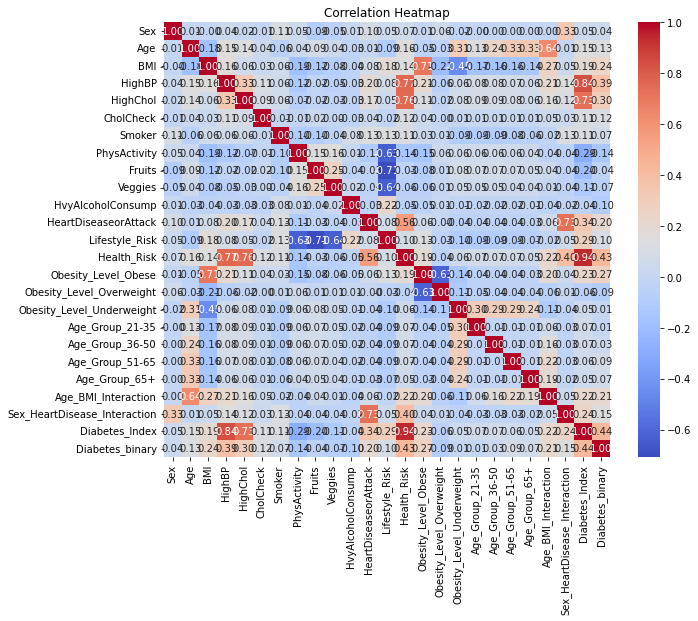

In [81]:
# Correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [82]:
# 1. Correlation with Target Variable
target_corr = merged_df.corr()['Diabetes_binary'].sort_values(ascending=False)
print("Correlation with Diabetes_binary:\n", target_corr)

# 2. Identify Weak Features (absolute correlation < 0.1)
weak_features = target_corr[abs(target_corr) < 0.1].index
print("Weak Features to Drop:\n", weak_features)

# 3. Drop Weak Features
merged_df = merged_df.drop(columns=weak_features)
print("Updated Columns:\n", merged_df.columns)


Correlation with Diabetes_binary:
 Diabetes_binary                 1.000000
Diabetes_Index                  0.438694
Health_Risk                     0.429076
HighBP                          0.385319
HighChol                        0.296049
Obesity_Level_Obese             0.266797
BMI                             0.237240
Age_BMI_Interaction             0.211737
HeartDiseaseorAttack            0.200991
Sex_HeartDisease_Interaction    0.146665
Age                             0.125750
CholCheck                       0.116138
Lifestyle_Risk                  0.100786
Age_Group_51-65                 0.086136
Age_Group_65+                   0.068600
Smoker                          0.068325
Sex                             0.041446
Age_Group_36-50                 0.034917
Obesity_Level_Underweight       0.010979
Age_Group_21-35                 0.005102
Fruits                         -0.039963
Veggies                        -0.069411
Obesity_Level_Overweight       -0.089030
HvyAlcoholConsump     

In [102]:
from sklearn.feature_selection import SelectKBest, chi2

# Select the top 10 features
X_selection = merged_df.drop('Diabetes_binary', axis=1)
y_selection = merged_df['Diabetes_binary']
best_features = SelectKBest(chi2, k=10).fit(X, y)

# Display selected features
selected_features = X.columns[best_features.get_support()]
print("Top features:", selected_features)


Top features: Index(['Age', 'BMI', 'HighBP', 'HighChol', 'HeartDiseaseorAttack',
       'Health_Risk', 'Obesity_Level_Obese', 'Age_BMI_Interaction',
       'Sex_HeartDisease_Interaction', 'Diabetes_Index'],
      dtype='object')


In [99]:
# List of irrelevant columns identified (replace with actual columns)
irrelevant_columns = ['CholCheck', 'PhysActivity', 'Lifestyle_Risk']

# Drop them from the dataset
merged_df = merged_df.drop(columns=irrelevant_columns)

# Check the final dataset
print("Final columns:", merged_df.columns)


Final columns: Index(['Age', 'BMI', 'HighBP', 'HighChol', 'HeartDiseaseorAttack',
       'Health_Risk', 'Obesity_Level_Obese', 'Age_BMI_Interaction',
       'Sex_HeartDisease_Interaction', 'Diabetes_Index', 'Diabetes_binary'],
      dtype='object')


In [103]:
merged_df.head()

,Age,BMI,HighBP,HighChol,HeartDiseaseorAttack,Health_Risk,Obesity_Level_Obese,Age_BMI_Interaction,Sex_HeartDisease_Interaction,Diabetes_Index,Diabetes_binary
0,70.0,0.61,1.0,1.0,0.0,2.0,0,42.70,0.0,0.7,1.0
1,60.0,0.79,1.0,1.0,0.0,2.0,0,47.40,0.0,0.7,1.0
2,50.0,0.87,1.0,1.0,0.0,2.0,0,43.50,0.0,0.7,1.0
3,42.0,0.75,1.0,1.0,0.0,2.0,0,31.50,0.0,0.7,0.0
4,26.0,0.91,1.0,1.0,0.0,2.0,0,23.66,0.0,0.7,0.0


In [104]:
X = merged_df.drop('Diabetes_binary', axis=1)
y = merged_df['Diabetes_binary']

In [105]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

# Explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [9.97444835e-01 1.92364338e-03 6.03743608e-04 2.01077529e-05
 2.69411859e-06]


In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [107]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the model
lr = LogisticRegression()

# Train the model
lr.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train_lr = lr.predict(X_train_scaled)
y_pred_test_lr = lr.predict(X_test_scaled)

# Evaluate the model
lr_train_accuracy = accuracy_score(y_train, y_pred_train_lr)
lr_test_accuracy = accuracy_score(y_test, y_pred_test_lr)

print(f"Training Accuracy: {lr_train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {lr_test_accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_test_lr))
#print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_test))


Training Accuracy: 72.66%
Testing Accuracy: 72.11%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.73      0.70      0.71      7185
         1.0       0.72      0.75      0.73      7403

    accuracy                           0.72     14588
   macro avg       0.72      0.72      0.72     14588
weighted avg       0.72      0.72      0.72     14588



In [109]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier(random_state=112)

# Train the model
rf.fit(X_train_scaled, y_train)

# Predictions
y_pred_train_rf = rf.predict(X_train_scaled)
y_pred_test_rf = rf.predict(X_test_scaled)

# Accuracy
rf_train_accuracy = accuracy_score(y_train, y_pred_train_rf)
rf_test_accuracy = accuracy_score(y_test, y_pred_test_rf)

print(f"Random Forest Training Accuracy: {rf_train_accuracy * 100:.2f}%")
print(f"Random Forest Testing Accuracy: {rf_test_accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_test_rf))
#print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_test))

Random Forest Training Accuracy: 76.89%
Random Forest Testing Accuracy: 70.92%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.72      0.68      0.70      7185
         1.0       0.70      0.74      0.72      7403

    accuracy                           0.71     14588
   macro avg       0.71      0.71      0.71     14588
weighted avg       0.71      0.71      0.71     14588



In [110]:
from sklearn.ensemble import GradientBoostingClassifier

# Train a Gradient Boosting model
gbm = GradientBoostingClassifier(random_state=112)

gbm.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train_gbm = gbm.predict(X_train_scaled)
y_pred_test_gbm = gbm.predict(X_test_scaled)

# Calculate and display accuracy as a percentage
gbm_train_accuracy = accuracy_score(y_train, y_pred_train_gbm)
gbm_test_accuracy = accuracy_score(y_test, y_pred_test_gbm)

print(f"Gradient Boosting Training Accuracy: {gbm_train_accuracy * 100:.2f}%")
print(f"Gradient Boosting Testing Accuracy: {gbm_test_accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_test_gbm))

Gradient Boosting Training Accuracy: 73.38%
Gradient Boosting Testing Accuracy: 72.68%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.67      0.71      7185
         1.0       0.71      0.78      0.74      7403

    accuracy                           0.73     14588
   macro avg       0.73      0.73      0.73     14588
weighted avg       0.73      0.73      0.73     14588



In [111]:
from sklearn.neural_network import MLPClassifier

# Train an MLPClassifier (Neural Network)
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1500, random_state=112)

mlp.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train_mlp = mlp.predict(X_train_scaled)
y_pred_test_mlp = mlp.predict(X_test_scaled)

# Calculate and display accuracy as a percentage
mlp_train_accuracy = accuracy_score(y_train, y_pred_train_mlp)
mlp_test_accuracy = accuracy_score(y_test, y_pred_test_mlp)

print(f"MLPClassifier Training Accuracy: {mlp_train_accuracy * 100:.2f}%")
print(f"MLPClassifier Testing Accuracy: {mlp_test_accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_test_mlp))

MLPClassifier Training Accuracy: 73.44%
MLPClassifier Testing Accuracy: 72.66%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.67      0.71      7185
         1.0       0.71      0.79      0.74      7403

    accuracy                           0.73     14588
   macro avg       0.73      0.73      0.73     14588
weighted avg       0.73      0.73      0.73     14588



In [ ]:
from sklearn.svm import SVC

# Train an SVM model
svm = SVC(random_state=42)

svm.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train_svm = svm.predict(X_train_scaled)
y_pred_test_svm = svm.predict(X_test_scaled)

# Accuracy
svm_train_accuracy = accuracy_score(y_train, y_pred_train_svm)
svm_test_accuracy = accuracy_score(y_test, y_pred_test_svm)

print(f"SVM Training Accuracy: {svm_train_accuracy * 100:.2f}%")
print(f"SVM Testing Accuracy: {svm_test_accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_test_svm))


In [112]:
# Store accuracies
model_accuracies = {
    "Logistic Regression": lr_test_accuracy,
    "Random Forest": rf_test_accuracy,
    "GradientBoosting Classifier": gbm_test_accuracy,
    "MLP CLassfier": mlp_test_accuracy,
    
}

# Display comparison
for model, accuracy in model_accuracies.items():
    print(f"{model}: {accuracy * 100:.2f}%")


Logistic Regression: 72.11%
Random Forest: 70.92%
GradientBoosting Classifier: 72.68%
MLP CLassfier: 72.66%
